In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.shape

(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(1337, 7)

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [12]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
num_col = [feature for feature in data.columns if data[feature].dtype != 'object']
print(f" Num_columns :{num_col}")
cat_col = [feature for feature in data.columns if data[feature].dtype == 'object']
print(f" Cat_columns :{cat_col}")

 Num_columns :['age', 'bmi', 'children', 'charges']
 Cat_columns :['sex', 'smoker', 'region']


In [14]:
def num_unique_values(data):
    unique_counts = {col: data[col].nunique() for col in data.columns}
    return unique_counts

num_unique_values(data)

{'age': 47,
 'sex': 2,
 'bmi': 548,
 'children': 6,
 'smoker': 2,
 'region': 4,
 'charges': 1337}

In [15]:
def unique_values(data):
    unique_counts = {col: data[col].unique() for col in data.columns}
    return unique_counts
unique_values(data)

{'age': array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
        59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
        20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64),
 'sex': array(['female', 'male'], dtype=object),
 'bmi': array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
        29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
        30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
        28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
        28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
        26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
        24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
        31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
        22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
        32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885

In [16]:
def outlier_detection(df, col):
    plt.figure(figsize=(8, 4)) 
    sns.boxplot(y=df[col]) 
    plt.title(f"Box Plot of {col}") 
    plt.show()

In [17]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

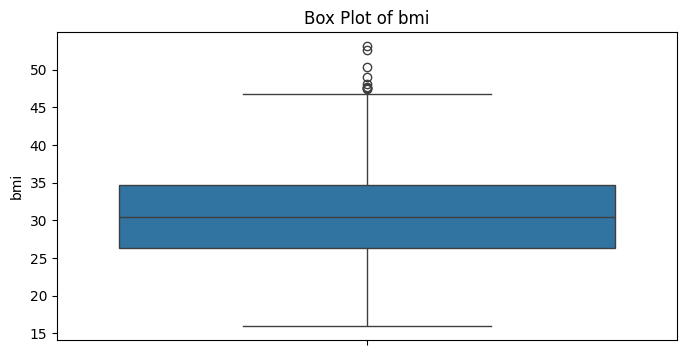

In [18]:
outlier_detection(data,'bmi')

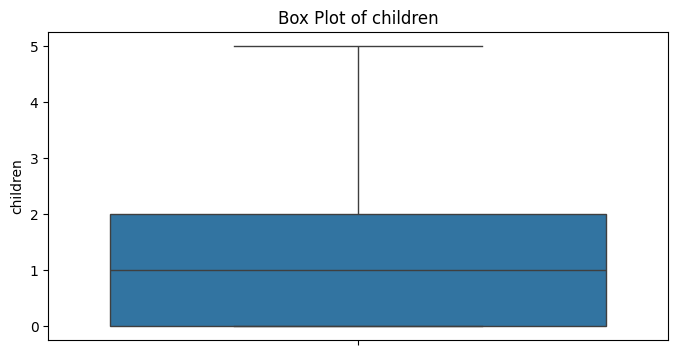

In [19]:
outlier_detection(data,'children')

In [30]:
Q1 = np.percentile(data['bmi'],25)
Q3 = np.percentile(data['bmi'],75)

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

print(lower,upper)

data = data[(data['bmi'] > lower) & (data['bmi'] < upper)]

16.22125 19.071249999999996


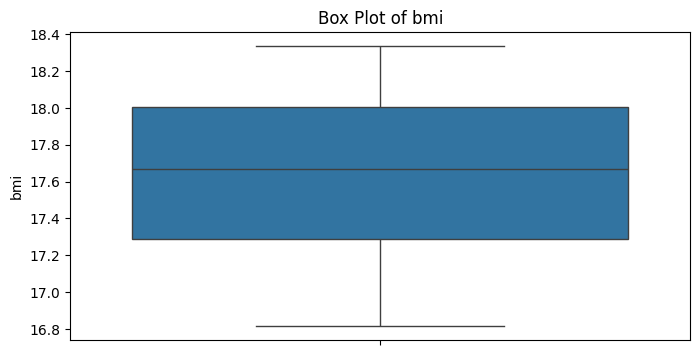

In [31]:
outlier_detection(data,'bmi')

In [23]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [24]:
num_col = ['age','bmi','children']

In [25]:
for i in num_col:
    print(f"column_name is {i}",data[i].skew())

column_name is age 0.054780773126998195
column_name is bmi 0.28391419385321137
column_name is children 0.9374206440474123


In [26]:
def distribution_plot(data, col):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data, x=col, fill=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()


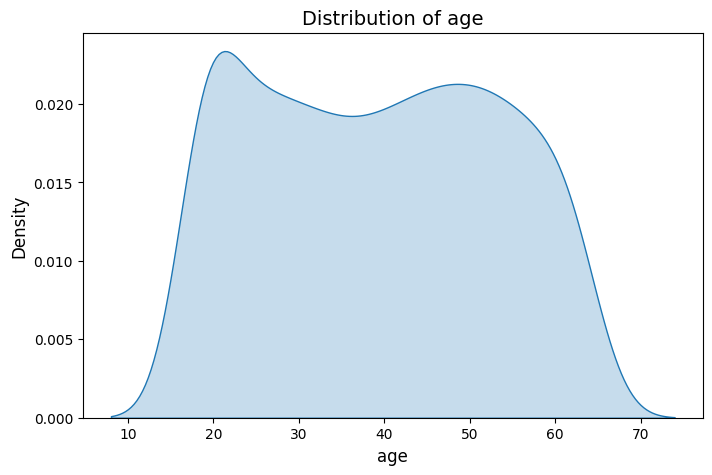

In [27]:
distribution_plot(data,'age')

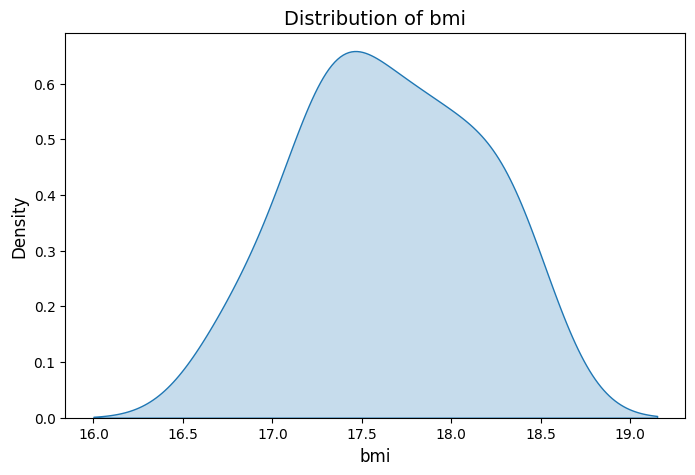

In [32]:
distribution_plot(data,'bmi')

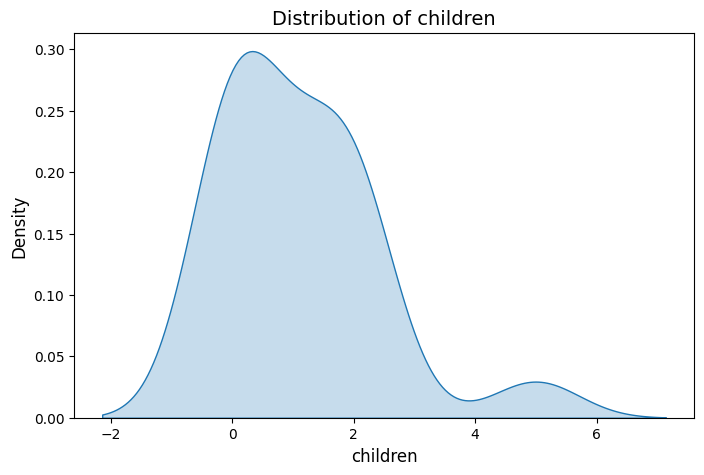

In [33]:
distribution_plot(data,'children')

In [34]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
one = OneHotEncoder()
scler = StandardScaler()

In [37]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [38]:
num_col

['age', 'bmi', 'children']

In [39]:
cat_col = ['sex','smoker','region']
num_col =['age', 'bmi', 'children']

perprocess = ColumnTransformer([
('num_pipeline',StandardScaler(),num_col),
('cat_pipeline',OneHotEncoder(),cat_col)
])

In [40]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [41]:
X = data.drop(columns=['charges'],axis = 1)
y = data['charges']

In [42]:
X = perprocess.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=12)

In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("XGBoost R^2 Score:", r2_score(y_test, xgb_pred))

XGBoost R^2 Score: 0.9574575328822394
